In [118]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [119]:
import numpy as np
import pandas as pd

In [120]:
import datetime as dt
import seaborn as sns

# Reflect Tables into SQLAlchemy ORM

In [121]:
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy import inspect
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [122]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [123]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [124]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [125]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [126]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [127]:
inspecting = inspect(engine)

# Exploratory Climate Analysis

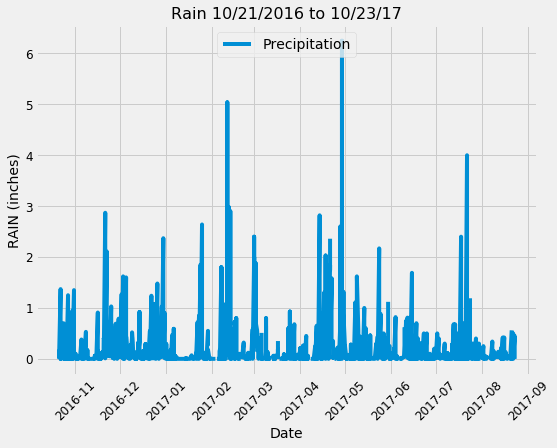

In [128]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
the_good_stuff = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    order_by(Measurement.date.desc()).all()
# Calculate the date 1 year ago from the last data point in the database
measure_id = [result[0] for result in the_good_stuff]
measure_station = [(result[1]) for result in the_good_stuff]
measure_date = [(result[2]) for result in the_good_stuff]
measure_prcp = [(result[3]) for result in the_good_stuff]
measure_tobs = [(result[4]) for result in the_good_stuff]

# Perform a query to retrieve the data and precipitation scores
measure_date_dt = pd.to_datetime(measure_date, format= "%Y/%m/%d")
# Save the query results as a Pandas DataFrame and set the index to the date column
measure_df = pd.DataFrame({"Id":measure_id, "Date":measure_date_dt, "Station":measure_station, "Prcp":measure_prcp, "Temp": measure_tobs}, index=measure_date_dt)
# Sort the dataframe by date
measure_df_index = measure_df[measure_df.Date.isin(pd.date_range(start='2016-10-21',end='2017-10-23'))]
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(measure_df_index["Date"],measure_df_index["Prcp"])

ax.set_xlabel("Date", size= 14)
ax.set_ylabel("RAIN (inches)", size = 14)
ax.set_title("Rain 10/21/2016 to 10/23/17", size= 16)
plt.xticks(rotation=45, size= 12)
plt.yticks(size= 12)
plt.legend(["Precipitation"],loc= 'upper center')

plt.show()

In [129]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measure_df_index[['Prcp']].describe()

,Prcp
count,1680.000000
mean,0.164952
std,0.428363
min,0.000000
25%,0.000000
50%,0.015000
75%,0.120000
max,6.250000


In [130]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()


[(9)]

In [131]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
#count
#group 
#orderby
columns=inspecting.get_columns('measurement')

In [132]:
best_station = engine.execute(
                    '''
                    SELECT measurement.station, COUNT(measurement.station)
                    FROM measurement
                    GROUP BY measurement.station
                    ORDER BY COUNT(measurement.station) DESC;
                    ''').fetchall()
best_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [133]:
for vacation in columns:
    print(vacation['name'], vacation['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [134]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
#min
#max
#avg
temp_observations = engine.execute('''
                SELECT measurement.tobs, measurement.date
                FROM measurement
                WHERE measurement.date > '2016-08-21' AND measurement.station = 'USC00519281';''').fetchall()

In [135]:
columns2=inspecting.get_columns('station')
for vacation2 in columns2:
    print(vacation2['name'], vacation2['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


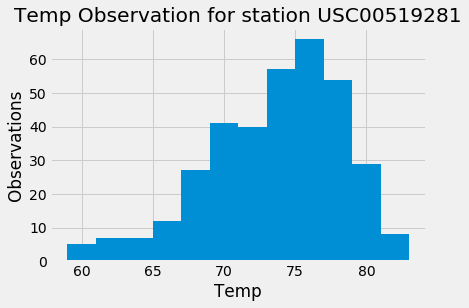

In [136]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#use date time
#time delta function
#pd. plotting today - 
#previosu_year = today - 365 use TOBS column, which station has highest number, give me all the observations for the last year
# 
temp_observations_df = pd.DataFrame(temp_observations, columns = ['Temperature', 'Date'])
plt.hist(temp_observations_df['Temperature'], bins=12)


plt.xlabel('Temp')
plt.ylabel('Observations')
plt.title('Temp Observation for station USC00519281')
plt.show()


In [137]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [138]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip= calc_temps('2017-02-28', '2017-03-05')

In [139]:
d1= dt.date(2017,2,28)
d2= dt.date(2017,3,5)

trip_days = d2-d1
best_vaca_ever=pd.date_range('2017-02-28', '2017-03-05',periods=5, normalize=True)


In [140]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip[0][1]

72.02777777777777

AttributeError: Unknown property max_min

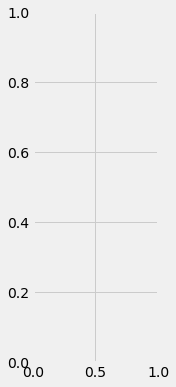

In [141]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

trip_dict = {'tmin':trip[0][0],'tavg':trip[0][1],'tmax':trip[0][2]}
max_min=trip_dict['tmax'] - trip_dict['tmin']
plt.figure(figsize=(2,6))
plt.bar(1,trip_dict['tavg'],max_min=max_min,align='center',color='green', alpha= .75)
plt.xticks([])
plt.ylim(0,100)
plt.ylabel("Temp(F)")
plt.xlabel("Trip Duration")
plt.grid(color='g', linestyle='-', linewidth=2,)
plt.suptitle("Average Temperature of Trip", size = 15)
plt.show()

##I coundnt figure this out :-( 

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
